In [2]:
# Load library
import numpy as np
import pandas as pd
import csv

from collections import Counter

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt

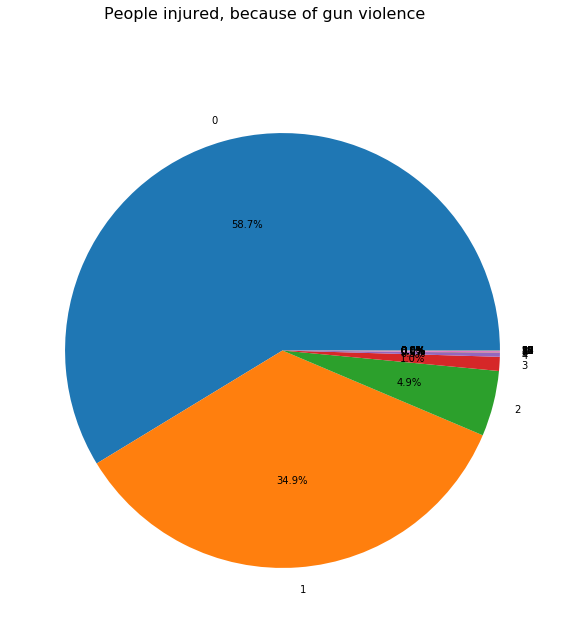

In [55]:
df = pd.read_csv("datagun.csv")

amount_k = []
# appends all the cities in dataset to list
for amount in df['n_injured']:
    amount = str(amount)
    amount_k.append(amount)
cnt = dict(Counter(amount_k))

amount_list = []
number_list = []
for element in cnt:
    number = cnt[element]
    number_list.append(number)
    amount_list.append(element)
    
labels = amount_list
fracs = number_list

# Make square figures and axes
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%')

plt.suptitle('People injured, because of gun violence', fontsize=16)

plt.show()

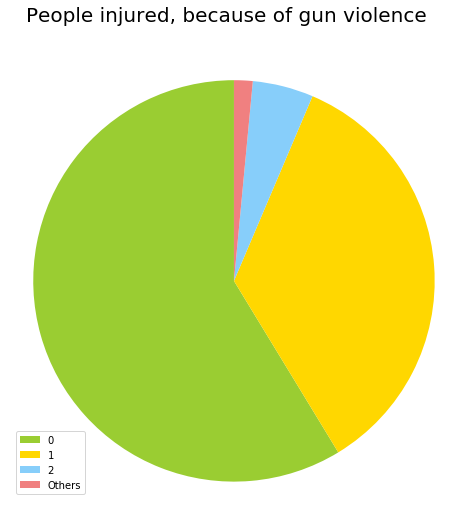

In [24]:
df = pd.read_csv("datagun.csv")

labels=['0', '1', '2', 'Others']
fracs=[58.7, 34.9, 4.9, 1.5]
colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

# Make square figures and axes
plt.figure(1, figsize=(8,8))

patches, texts = plt.pie(fracs, colors=colors, startangle=90)

plt.suptitle('People injured, because of gun violence', fontsize=20)
plt.legend(patches, labels, loc="lower left")

plt.axis('equal')

plt.show()

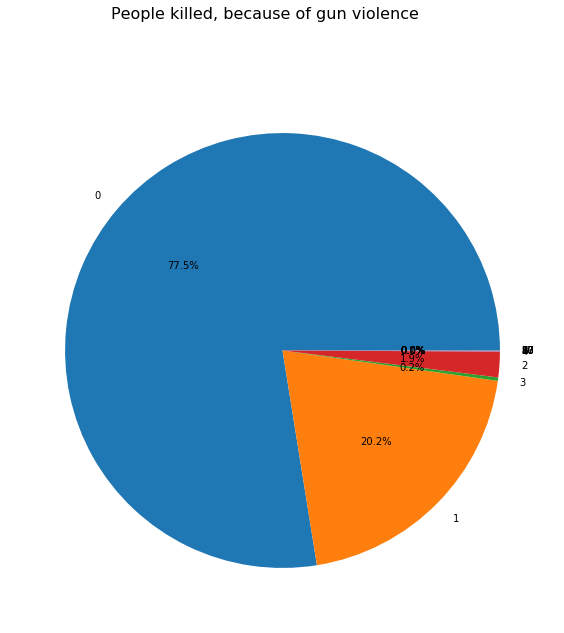

In [26]:
df = pd.read_csv("datagun.csv")

amount_k = []
# appends all the cities in dataset to list
for amount in df['n_killed']:
    amount = str(amount)
    amount_k.append(amount)
cnt = dict(Counter(amount_k))

amount_list = []
number_list = []
for element in cnt:
    number = cnt[element]
    number_list.append(number)
    amount_list.append(element)
    
labels = amount_list
fracs = number_list

explode = (0, 0.05, 0, 0)

# Make square figures and axes
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%')

plt.suptitle('People killed, because of gun violence', fontsize=16)

plt.show()

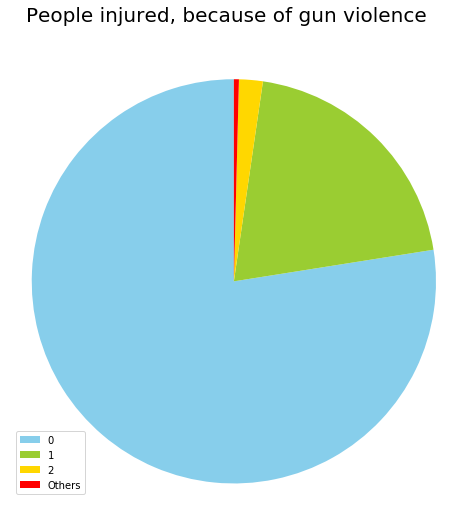

In [31]:
df = pd.read_csv("datagun.csv")

labels=['0', '1', '2', 'Others']
fracs=[77.5, 20.2, 1.9, 0.4]
colors=['skyblue', 'yellowgreen', 'gold', 'red']

# Make square figures and axes
plt.figure(1, figsize=(8,8))

patches, texts = plt.pie(fracs, colors=colors, startangle=90)

plt.suptitle('People injured, because of gun violence', fontsize=20)
plt.legend(patches, labels, loc="lower left")

plt.axis('equal')

plt.show()